# An End-to-End AI Voice Assistance Pipeline

In [ ]:
!nvidia-smi

Tue Aug 20 07:08:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Speech to text (STT) using whisper as a pretrained model

In [ ]:
! pip install git+https://github.com/huggingface/transformers -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from transformers import pipeline

In [ ]:
whisper = pipeline('automatic-speech-recognition', model='openai/whisper-medium', device =0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
!wget -O audio.mp3 http://www.moviesoundclips.net/movies1/ironman/both.mp3

--2024-08-22 09:33:43--  http://www.moviesoundclips.net/movies1/ironman/both.mp3
Resolving www.moviesoundclips.net (www.moviesoundclips.net)... 198.54.115.219
Connecting to www.moviesoundclips.net (www.moviesoundclips.net)|198.54.115.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49536 (48K) [audio/mpeg]
Saving to: ‘audio.mp3’

audio.mp3           100%[===================>]  48.38K   151KB/s    in 0.3s    

2024-08-22 09:33:44 (151 KB/s) - ‘audio.mp3’ saved [49536/49536]



# Imported the Audio from the Web

In [ ]:
from IPython.display import Audio,display
display(Audio('audio.mp3', autoplay=True))

In [ ]:
from transformers import pipeline

In [ ]:
whisper = pipeline('automatic-speech-recognition', model='openai/whisper-medium', device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
text=whisper('audio.mp3')

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:480: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


# The output  Text

In [ ]:
text

{'text': ' Is it better to be feared or respected? And I say, is it too much to ask for both?'}

# Text Input in LLM Using the LLAMA2

In [ ]:
! pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


# Setting the Replicate Api Token

In [ ]:
import os

os.environ['REPLICATE_API_TOKEN'] ="r8_Sh8Ffr2Exgy6CKUWllGQnHgQ3lDwC2n3d3pxY"

# Running the llama2 model

In [ ]:
import replicate

# the prompt is the same text which was obtained above

pre_prompt = "you are a helpful assistant. you do not respond as a 'user' or pretend to be a 'user'. you only respond once as a 'assistant'"
prompt_input = " Is it better to be feared or respected? And I say, is it too much to ask for both?"

output = replicate.run('a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5', # LLM model
                        input={"prompt": f"{pre_prompt} {prompt_input} Assistant: ",  # Prompts
                        "temperature":0.1, "top_p":0.9, "max_length":128, "repetition_penalty":1})  # Model parameters


In [ ]:
output

<generator object Prediction.output_iterator at 0x7b95db74a810>

# The Response Generated

In [ ]:
full_response = ""

for item in output:
  full_response += item

print(full_response)

 Hello! As a helpful and respectful assistant, I'm here to provide you with the best possible response.

The question of whether it is better to be feared or respected is a complex one, and there is no straightforward answer. Both fear and respect can be powerful motivators, but they can also have negative consequences if taken to an extreme.

Fear can be a powerful tool for achieving compliance or obedience, but it can also lead to resentment, rebellion, and even violence. When people fear us, they may not necessarily respect us, and they may be less likely to cooperate with us in the long run.

Respect, on the other hand, is a more positive and sustainable approach to leadership. When people respect us, they are more likely to listen to our ideas, follow our guidance, and work together with us towards a common goal. Respect is built on trust, empathy, and open communication, and it is more likely to lead to long-term success and collaboration.

So, while it may be tempting to try to 

# Text to Speech (TTS) using parler pretrained model

In [ ]:
pip install git+https://github.com/huggingface/parler-tts.git

  Cloning https://github.com/huggingface/parler-tts.git to /tmp/pip-req-build-1vmj7gz7
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/parler-tts.git /tmp/pip-req-build-1vmj7gz7
  Resolved https://github.com/huggingface/parler-tts.git to commit 8e465f1b5fcd223478e07175cb40494d19ffbe17
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.

In [ ]:
import torch
from parler_tts import ParlerTTSForConditionalGeneration
from transformers import AutoTokenizer
import soundfile as sf

In [ ]:
device="cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
model=ParlerTTSForConditionalGeneration.from_pretrained("parler-tts/parler-tts-mini-v1").to(device)
tokenizer = AutoTokenizer.from_pretrained("parler-tts/parler-tts-mini-v1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.51G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

# The Text Input

In [ ]:
prompt = prompt = """Hello! As a helpful and respectful assistant, I'm here to provide you with the best possible response.
The question of whether it is better to be feared or respected is a complex one, and there is no straightforward answer.
Both fear and respect can be powerful motivators, but they can also have negative consequences if taken to an extreme."""


description = "Jon's voice is monotone yet slightly fast in delivery, with a very close recording that almost has no background noise."

In [ ]:
input_ids = tokenizer(prompt,description, return_tensors="pt").input_ids.to(device)
prompt_input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

In [ ]:
generation = model.generate(input_ids=input_ids, prompt_input_ids=prompt_input_ids)
audio_arr = generation.cpu().numpy().squeeze()
sf.write("parler_tts_out_2.wav", audio_arr, model.config.sampling_rate)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


# the original

In [ ]:
import IPython
IPython.display.Audio("parler_tts_out_2.wav")

# Adjusting the Pitch

In [ ]:
import librosa
import soundfile as sf

# Loading the generated audio from the NumPy array
audio_arr = generation.cpu().numpy().squeeze()

# Adjusting the pitch
def adjust_pitch(audio_data, sampling_rate, n_steps):
    return librosa.effects.pitch_shift(audio_data, sr=sampling_rate, n_steps=n_steps)

n_steps = 2 # this value can be changed as per the requirement
adjusted_audio = adjust_pitch(audio_arr, model.config.sampling_rate, n_steps)

# Saving the adjusted audio to a .wav file
sf.write("parler_tts_out_adjusted_pitch.wav", adjusted_audio, model.config.sampling_rate)


# The Adjusted Pitch Audio

In [ ]:
from IPython.display import Audio
Audio("parler_tts_out_adjusted_pitch.wav")

# Voice Activity Detection (VAD) using a pre-trained model

In [ ]:
import torch
torch.set_num_threads(1)

model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad', model='silero_vad')
(get_speech_timestamps, _, read_audio, _, _) = utils

wav = read_audio('/content/parler_tts_out_adjusted_pitch.wav') # backend (sox, soundfile, or ffmpeg) required!
speech_timestamps = get_speech_timestamps(wav, model)

Using cache found in /root/.cache/torch/hub/snakers4_silero-vad_master


In [ ]:
print(speech_timestamps)

[{'start': 1056, 'end': 8672}, {'start': 24096, 'end': 58848}, {'start': 60960, 'end': 101856}, {'start': 114720, 'end': 173024}, {'start': 184864, 'end': 217056}, {'start': 242720, 'end': 281568}, {'start': 304672, 'end': 353760}, {'start': 364576, 'end': 371334}]


# Visualizing the Results

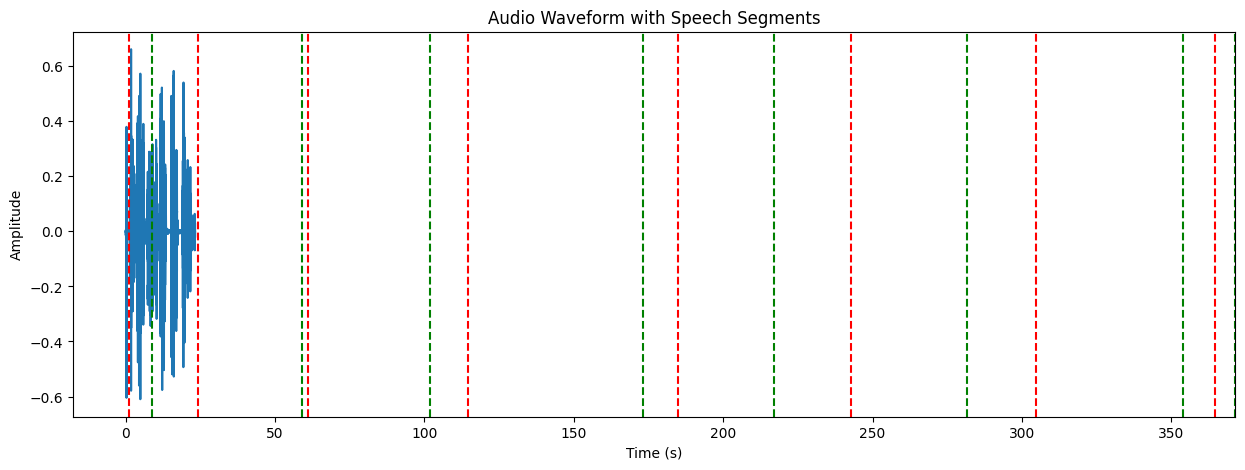

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Loading audio file
audio, samplerate = sf.read('/content/parler_tts_out_adjusted_pitch.wav')

# Creating time array
times = np.arange(len(audio)) / samplerate

# Plotting the waveform
plt.figure(figsize=(15, 5))
plt.plot(times, audio)

# Plotting the speech segments
for segment in speech_timestamps:
    plt.axvline(x=segment['start'] / 1000, color='r', linestyle='--')
    plt.axvline(x=segment['end'] / 1000, color='g', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform with Speech Segments')
plt.show()
